<img src="KITlogo_1c_deutsch-eps-converted-to.pdf" width="200" height="200" align="right"/>

##### Lehrstuhl für Analytics and Statistics (IOR)
##### Prof. Dr. Oliver Grothe
##### WS 2021

# Analyse multivariater Daten
## Übung 9

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import t
from numpy import linalg
import scipy
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
#!pip install seaborn --upgrade
import matplotlib.pyplot as plt
# Plotting
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style='darkgrid')

# Warnungen unterdrücken
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [10]:
data=pd.read_csv('pisa.csv', sep=';',header=0,index_col=0)

data.head()

,Lesekompetenz,Mathematische \nGrundbildung,Naturwissenschaftliche \nGrundbildung
Land,,,
Australien,528.0,533.0,528.0
Belgien,507.0,520.0,496.0
Brasilien,396.0,334.0,375.0
D�nemark,497.0,514.0,481.0
Deutschland,484.0,490.0,487.0


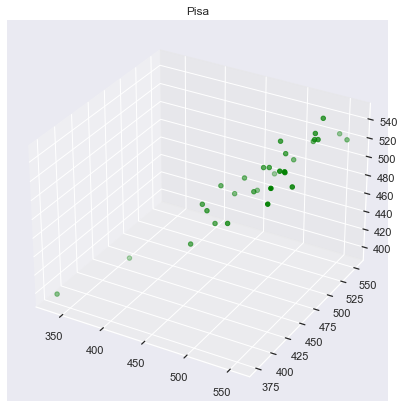

In [28]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
z = data.iloc[:,0]
x = data.iloc[:,1]
y = data.iloc[:,2]
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("Pisa")
 
# show plot
plt.show()

In [12]:
corr=data.corr()
corr

,Lesekompetenz,Mathematische \nGrundbildung,Naturwissenschaftliche \nGrundbildung
Lesekompetenz,1.000000,0.915753,0.952930
Mathematische \nGrundbildung,0.915753,1.000000,0.931999
Naturwissenschaftliche \nGrundbildung,0.952930,0.931999,1.000000


In [24]:
cov=data.cov()
cov

,Lesekompetenz,Mathematische \nGrundbildung,Naturwissenschaftliche \nGrundbildung
Lesekompetenz,1109.389247,1428.324731,1195.613978
Mathematische \nGrundbildung,1428.324731,2192.873118,1644.031183
Naturwissenschaftliche \nGrundbildung,1195.613978,1644.031183,1418.978495


In [25]:
values_cov, vectors_cov = np.linalg.eig(cov)

In [26]:
values_cov/np.sum(values_cov)

array([0.95600581, 0.01221571, 0.03177848])

In [18]:
vectors_cov

array([[-0.47993961, -0.70374348,  0.52383499],
       [-0.68430926, -0.07333956, -0.72549442],
       [-0.54897979,  0.70665864,  0.44637961]])

In [30]:
values_corr, vectors_corr = np.linalg.eig(corr)

In [51]:
values_corr/np.sum(values_corr)

array([0.95573469, 0.01496201, 0.02930331])

In [31]:
vectors_corr

array([[-0.5776974 , -0.59936162,  0.55410411],
       [-0.57332755, -0.18524162, -0.79811094],
       [-0.58100021,  0.77874976,  0.23661692]])

In [42]:
vectors=np.zeros((3,3))
vectors=np.hstack((vectors,vectors_corr))
vectors*100

array([[  0.        ,   0.        ,   0.        , -57.76973992,
        -59.93616168,  55.41041124],
       [  0.        ,   0.        ,   0.        , -57.33275461,
        -18.52416241, -79.81109357],
       [  0.        ,   0.        ,   0.        , -58.10002065,
         77.87497628,  23.66169205]])

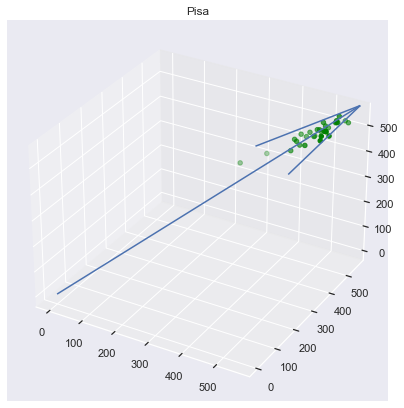

In [50]:
# Creating dataset
z = data.iloc[:,0]
x = data.iloc[:,1]
y = data.iloc[:,2]
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("Pisa")

ax.quiver(0,0,0,vectors_corr[0,0]*-1000,vectors_corr[1,0]*-1000,vectors_corr[2,0]*-1000)
# show plot
plt.show()